In [2]:

%matplotlib inline
# !pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig
import scipy
from scipy.fftpack import fft,ifft

# Convolución de un sonido con la respuesta impulsional de un salón


La propagación del sonido en habitaciones se modela mediante la [ecuación de onda lineal](https://en.wikipedia.org/wiki/Wave_equation), que es una ecuación diferencial parcial lineal de segundo orden con coeficientes constantes.

La ruta de propagación desde una fuente (por ejemplo, un altavoz) en una posición hasta un receptor (por ejemplo, un micrófono) en otra posición puede interpretarse como un sistema LTI.

Este sistema queda completamente caracterizado por la respuesta al impulso entre la fuente y el receptor. Así, se puede realizar la síntesis de entornos acústicos virtuales.

Si una señal fuente (p. ej., voz, instrumento) sin ningún efecto de sala se convoluciona con la respuesta de impulso de una sala (p. ej., una sala de conciertos), se crea la impresión de que la fuente suena en la sala. Esto también se conoce como [reverberación de convolución](https://en.wikipedia.org/wiki/Convolution_reverb). 



## Lea el sonido sin efectos

First a source signal $x[k]$ is loaded into the vector `x` using the [`soundfile`](http://pysoundfile.readthedocs.io/en/latest/) module for Python

In [15]:
x, fs = sf.read('datos/JPDP003.wav')# Lee un archivo .wav
x = x.T[0] #Selecciona solo un canal de grabación
sf.write('temp.wav',x,fs)
x

array([ 0.00183105,  0.00445557,  0.00924683, ..., -0.00192261,
        0.00289917, -0.00039673])

Se grafica la señal de entrada $x[k]$ cambiando el índice de muestra $k$ por el tiempo $t = k T$. El intervalo de muestreo es $T$. 

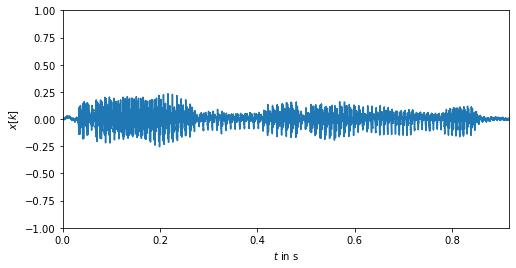

In [16]:
plt.figure(figsize=(8,4))
t = np.arange(len(x)) / fs
plt.plot(t, x)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);

## Lea la respuesta impulsional del salón

La respuesta de impulso $h[k]$ de la habitación se carga en el vector `h` y se grafica.

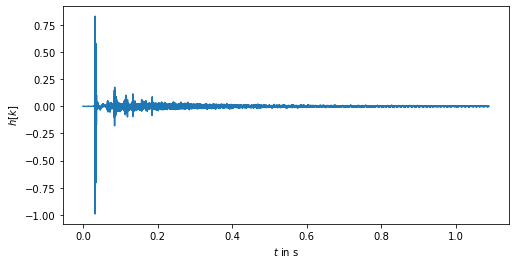

In [17]:
h, fsh = sf.read('datos/room_impulse_response.wav')
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(h))
plt.plot(t, h)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$h[k]$');

Observe que $h[k]$ tiene una duración finita, por lo que es un filtro FIR.

## Convolución

La halla la convolución entre la señal $x[k]$ y la respuesta de impulso de la habitación $h[k]$ para calcular la señal de salida $y[k] = x[k] * h[k]$.

In [18]:
y = np.convolve(h, x)

Se grafica la señal de salida

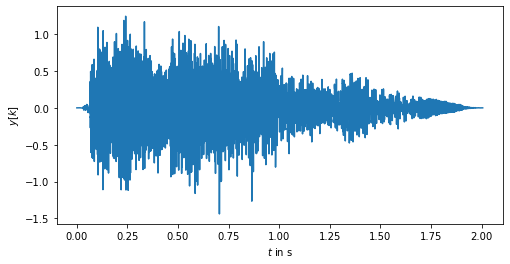

In [19]:
# Escriba su código

plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(y))
plt.plot(t, y)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[k]$');

## Auralización

Se llevan las señales de entrada $x[k]$ y de salida $y[k]$ a tener el mismo valor máximo y se llevan a archivos temporales.

In [21]:
sf.write('original.wav', x, fs)

sf.write('convolucionado.wav',
         max(x) * y / np.max(np.abs(y)), fs)

Escuche y compare.

<audio src="original.wav" controls>Your browser does not support the audio element.</audio>
[original.wav](original.wav)

<audio src="convolucionado.wav" controls>Your browser does not support the audio element.</audio>
[convolucionado.wav](convolucionado.wav)

**Ejercicio**

Compare los espectros de las señales de entrada $x[k]$ y salida $y[k]$.

In [8]:
# Escriba su código



Describa el efecto del filtro de reverberación aplicado.



-------------

Explore el dataset disponible en esta [URL](http://isophonics.net/content/room-impulse-response-data-set).

Use una respuesta impulsional de salón con un sonido propio y repita el análisis.

Note que las grabaciones que se han realizado tienen ruido de fondo. ¿Cómo cree que se puede mejorar esa condición?